In [1]:
suppressMessages(suppressWarnings(source("config.R")))
library(rjson)

## Lognormal distribution

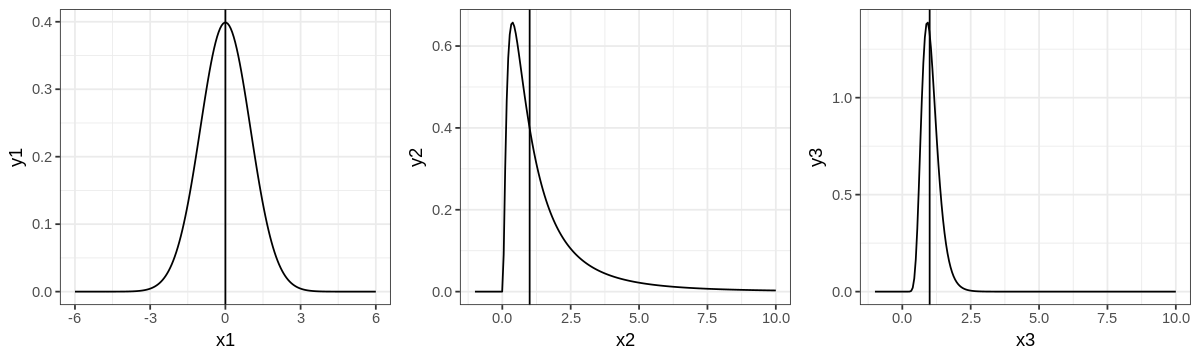

In [36]:
x1  = seq(-6,6,length.out=200)
y1  = dnorm(x1)
gp1 = qplot(x1, y1, geom="line") + theme_bw() + geom_vline(xintercept = 0)

x2  = seq(-1,10,length.out=200)
y2  = dlnorm(x2)
gp2 = qplot(x2, y2, geom="line") + theme_bw() + geom_vline(xintercept = 1)

x3  = seq(-1,10,length.out=200)
y3  = dlnorm(x3, sdlog = 0.3)
gp3 = qplot(x3, y3, geom="line") + theme_bw() + geom_vline(xintercept = 1)


options(repr.plot.height=3, repr.plot.width=10)
grid.arrange(gp1, gp2, gp3, ncol=3)

## Negative binomial distribution

Warning message:
“Removed 1 rows containing non-finite values (stat_bin).”Warning message:
“Removed 2 rows containing missing values (geom_bar).”Warning message:
“Removed 2 rows containing missing values (geom_bar).”Warning message:
“Removed 2 rows containing missing values (geom_bar).”

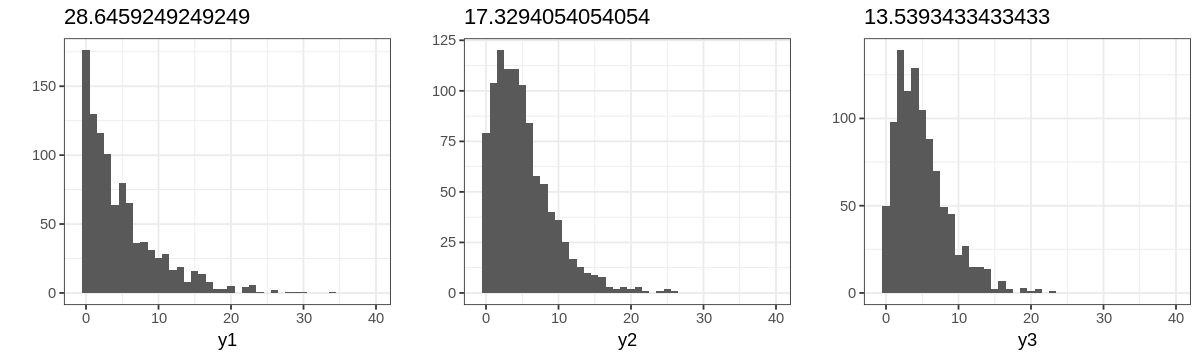

In [3]:
n   = 1000

y1  = MASS::rnegbin(n=n, mu=5, theta=1)
gp1 = qplot(y1, geom="histogram", binwidth=1) + theme_bw() + xlim(-1,40) + labs(title=paste(var(y1)))

y2  = MASS::rnegbin(n=n, mu=5, theta=2)
gp2 = qplot(y2, geom="histogram", binwidth=1) + theme_bw() + xlim(-1,40) + labs(title=paste(var(y2)))

y3  = MASS::rnegbin(n=n, mu=5, theta=3)
gp3 = qplot(y3, geom="histogram", binwidth=1) + theme_bw() + xlim(-1,40) + labs(title=paste(var(y3)))


options(repr.plot.height=3, repr.plot.width=10)
grid.arrange(gp1, gp2, gp3, ncol=3)

## Initial values

In [4]:
N_SEG = 15
lst = list(
    SEG = rep(1,N_SEG)
)

tmp = toJSON(lst)
write(tmp, "./model_kmer_sim/init.json")

## Simulate trivial sample (v1)

In [5]:
### set parameters
N_FRAG = 10
N_SEG  = 15
N_SEG_PER_FRAG = 5
N_REP  = 10
THETA  = 5

### set seed
set.seed(123)

### define the true segment factors
segments = rep(1, N_SEG)
cat("True segment factors:\n")
print(segments); cat("\n")

### generate input
input = lapply(1:N_FRAG, function(i){
    rep(3, N_REP)
})

### generate output
output = list()
for (i in 1:N_FRAG) {
    ### simulating output
    seg_effects = segments[i:(i + N_SEG_PER_FRAG - 1)]
    seg_effects = prod(seg_effects)
    output[[i]] = MASS::rnegbin(n=N_REP, mu=input[[i]] * seg_effects, theta=THETA)
    
    ### print both input and generated output
    cat("Fragment:", i, "\tSegment effect:", seg_effects, "\n")
    cat("Input: "); print(input[[i]])
    cat("Output:"); print(output[[i]])
    cat("\n")
}

True segment factors:
 [1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

Fragment: 1 	Segment effect: 1 
Input:  [1] 3 3 3 3 3 3 3 3 3 3
Output: [1] 2 5 1 3 4 1 4 2 5 5

Fragment: 2 	Segment effect: 1 
Input:  [1] 3 3 3 3 3 3 3 3 3 3
Output: [1] 0 1 3 2 3 6 4 2 2 3

Fragment: 3 	Segment effect: 1 
Input:  [1] 3 3 3 3 3 3 3 3 3 3
Output: [1] 3 2 3 1 2 5 4 3 6 2

Fragment: 4 	Segment effect: 1 
Input:  [1] 3 3 3 3 3 3 3 3 3 3
Output: [1] 3 3 3 3 5 5 6 6 1 3

Fragment: 5 	Segment effect: 1 
Input:  [1] 3 3 3 3 3 3 3 3 3 3
Output: [1] 1 1 3 4 2 2 2 3 4 2

Fragment: 6 	Segment effect: 1 
Input:  [1] 3 3 3 3 3 3 3 3 3 3
Output: [1] 4 3 5 1 3 1 3 2 2 4

Fragment: 7 	Segment effect: 1 
Input:  [1] 3 3 3 3 3 3 3 3 3 3
Output: [1] 5 2 4 2 4 1 4 2 4 1

Fragment: 8 	Segment effect: 1 
Input:  [1] 3 3 3 3 3 3 3 3 3 3
Output: [1] 8 0 0 1 2 6 9 5 1 3

Fragment: 9 	Segment effect: 1 
Input:  [1] 3 3 3 3 3 3 3 3 3 3
Output: [1] 2 0 2 1 1 3 7 0 0 5

Fragment: 10 	Segment effect: 1 
Input:  [1] 3 3 3 3 3 3 3 3 3 3
Outp

In [6]:
lst = list(
    N_DATA = length(unlist(output)),
    N_FRAG = N_FRAG,
    N_SEG  = N_SEG,
    N_SEG_PER_FRAG = N_SEG_PER_FRAG,
    N_REP  = N_REP,
    OUTPUT = unlist(output),
    INPUT  = unlist(input),
    PHI = THETA,
    SEG_TRUE = segments
)

tmp = toJSON(lst)
write(tmp, "./model_kmer_sim/input_trivial_v1.json")

## Simulate trivial sample (v2)

In [21]:
### set parameters
N_FRAG = 10
N_SEG  = 15
N_SEG_PER_FRAG = 5
N_REP  = 10
THETA  = 5

### set seed
set.seed(123)

### define the true segment factors
segments = 1:15 * 0.1 + 0.2
cat("True segment factors:\n")
print(segments); cat("\n")

### generate input
input = lapply(1:N_FRAG, function(i){
    rep(3, N_REP)
})

### generate output
output = list()
for (i in 1:N_FRAG) {
    ### simulating output
    seg_effects = segments[i:(i + N_SEG_PER_FRAG - 1)]
    seg_effects = prod(seg_effects)
    output[[i]] = MASS::rnegbin(n=N_REP, mu=input[[i]] * seg_effects, theta=THETA)
    
    ### print both input and generated output
    cat("Fragment:", i, "\tSegment effect:", seg_effects, "\n")
    cat("Input: "); print(input[[i]])
    cat("Output:"); print(output[[i]])
    cat("\n")
}

True segment factors:
 [1] 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7

Fragment: 1 	Segment effect: 0.0252 
Input:  [1] 3 3 3 3 3 3 3 3 3 3
Output: [1] 0 0 0 0 0 0 0 0 0 0

Fragment: 2 	Segment effect: 0.0672 
Input:  [1] 3 3 3 3 3 3 3 3 3 3
Output: [1] 0 0 0 0 0 1 0 0 0 0

Fragment: 3 	Segment effect: 0.1512 
Input:  [1] 3 3 3 3 3 3 3 3 3 3
Output: [1] 0 0 0 0 0 2 0 1 2 0

Fragment: 4 	Segment effect: 0.3024 
Input:  [1] 3 3 3 3 3 3 3 3 3 3
Output: [1] 1 1 1 1 2 2 3 1 0 1

Fragment: 5 	Segment effect: 0.5544 
Input:  [1] 3 3 3 3 3 3 3 3 3 3
Output: [1] 0 0 2 2 1 1 1 2 3 1

Fragment: 6 	Segment effect: 0.9504 
Input:  [1] 3 3 3 3 3 3 3 3 3 3
Output: [1] 4 3 5 1 3 1 3 2 2 3

Fragment: 7 	Segment effect: 1.5444 
Input:  [1] 3 3 3 3 3 3 3 3 3 3
Output: [1] 7 3 5 3 6 2 6 4 6 2

Fragment: 8 	Segment effect: 2.4024 
Input:  [1] 3 3 3 3 3 3 3 3 3 3
Output: [1] 17  4  2  9  5 16  5  8  3  5

Fragment: 9 	Segment effect: 3.6036 
Input:  [1] 3 3 3 3 3 3 3 3 3 3
Output: [1] 15  7

In [8]:
lst = list(
    N_DATA = length(unlist(output)),
    N_FRAG = N_FRAG,
    N_SEG  = N_SEG,
    N_SEG_PER_FRAG = N_SEG_PER_FRAG,
    N_REP  = N_REP,
    OUTPUT = unlist(output),
    INPUT  = unlist(input),
    PHI = THETA,
    SEG_TRUE = segments
)

tmp = toJSON(lst)
write(tmp, "./model_kmer_sim/input_trivial_v21.json")

**Increase data points**

In [24]:
### set parameters
N_FRAG = 10
N_SEG  = 15
N_SEG_PER_FRAG = 5
N_REP  = 1000
THETA  = 5

### set seed
set.seed(123)

### define the true segment factors
segments = 1:15 * 0.1 + 0.2
cat("True segment factors:\n")
print(segments); cat("\n")

### generate input
input = lapply(1:N_FRAG, function(i){
    rep(3, N_REP)
})

### generate output
output = list()
for (i in 1:N_FRAG) {
    ### simulating output
    seg_effects = segments[i:(i + N_SEG_PER_FRAG - 1)]
    seg_effects = prod(seg_effects)
    output[[i]] = MASS::rnegbin(n=N_REP, mu=input[[i]] * seg_effects, theta=THETA)
    
    ### print both input and generated output
    cat("Fragment:", i, "\tSegment effect:", seg_effects, "\n")
    cat("Input: "); print(input[[i]][1:100])
    cat("Output:"); print(output[[i]][1:100])
    cat("\n")
}

True segment factors:
 [1] 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7

Fragment: 1 	Segment effect: 0.0252 
Input:   [1] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 [38] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 [75] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
Output:  [1] 0 0 0 0 1 0 0 0 0 1 0 0 1 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [38] 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0
 [75] 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0

Fragment: 2 	Segment effect: 0.0672 
Input:   [1] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 [38] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 [75] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
Output:  [1] 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 [38] 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 2 0 1 2 0 0 2 0 0 0 0 0 0 0 0 0

In [25]:
lst = list(
    N_DATA = length(unlist(output)),
    N_FRAG = N_FRAG,
    N_SEG  = N_SEG,
    N_SEG_PER_FRAG = N_SEG_PER_FRAG,
    N_REP  = N_REP,
    OUTPUT = unlist(output),
    INPUT  = unlist(input),
    PHI = THETA,
    SEG_TRUE = segments
)

tmp = toJSON(lst)
write(tmp, "./model_kmer_sim/input_trivial_v22.json")

## Simulate trivial sample (v3)

In [43]:
### set parameters
N_FRAG = 10
N_SEG  = 15
N_SEG_PER_FRAG = 5
N_REP  = 10
THETA  = 5

### set seed
set.seed(123)

### define the true segment factors
segments = rlnorm(n = N_SEG, meanlog = 0, sdlog = 1)
cat("True segment factors:\n")
print(segments); cat("\n")

### generate input
input = lapply(1:N_FRAG, function(i){
    rep(3, N_REP)
})

### generate output
output = list()
for (i in 1:N_FRAG) {
    ### simulating output
    seg_effects = segments[i:(i + N_SEG_PER_FRAG - 1)]
    seg_effects = prod(seg_effects)
    output[[i]] = MASS::rnegbin(n=N_REP, mu=input[[i]] * seg_effects, theta=THETA)
    
    ### print both input and generated output
    cat("Fragment:", i, "\tSegment effect:", seg_effects, "\n")
    cat("Input: "); print(input[[i]])
    cat("Output:"); print(output[[i]])
    cat("\n")
}

True segment factors:
 [1] 0.5709374 0.7943926 4.7526783 1.0730536 1.1380175 5.5570366 1.5855260
 [8] 0.2822220 0.5031571 0.6404002 3.4010418 1.4330626 1.4929760 1.1170404
[15] 0.5735896

Fragment: 1 	Segment effect: 2.632282 
Input:  [1] 3 3 3 3 3 3 3 3 3 3
Output: [1] 10  8  3  2  3  4  7 10  9 10

Fragment: 2 	Segment effect: 25.62048 
Input:  [1] 3 3 3 3 3 3 3 3 3 3
Output: [1]  57  87  69  78  34  73  62 130  27  73

Fragment: 3 	Segment effect: 51.13584 
Input:  [1] 3 3 3 3 3 3 3 3 3 3
Output: [1] 146 152  99 324  64 149 171 139 199 297

Fragment: 4 	Segment effect: 3.036532 
Input:  [1] 3 3 3 3 3 3 3 3 3 3
Output: [1]  4 17 14 10  6 10  4 10  4 20

Fragment: 5 	Segment effect: 1.423836 
Input:  [1] 3 3 3 3 3 3 3 3 3 3
Output: [1]  5 10  3  3  5  2  2  2  3  5

Fragment: 6 	Segment effect: 0.8012399 
Input:  [1] 3 3 3 3 3 3 3 3 3 3
Output: [1] 3 3 5 3 5 2 1 0 1 6

Fragment: 7 	Segment effect: 0.4903783 
Input:  [1] 3 3 3 3 3 3 3 3 3 3
Output: [1] 4 3 0 0 1 0 1 3 1 0

Fragment: 8 

In [44]:
lst = list(
    N_DATA = length(unlist(output)),
    N_FRAG = N_FRAG,
    N_SEG  = N_SEG,
    N_SEG_PER_FRAG = N_SEG_PER_FRAG,
    N_REP  = N_REP,
    OUTPUT = unlist(output),
    INPUT  = unlist(input),
    PHI = THETA,
    SEG_TRUE = segments
)

tmp = toJSON(lst)
write(tmp, "./model_kmer_sim/input_trivial_v31.json")

**Increase data points**

In [45]:
### set parameters
N_FRAG = 10
N_SEG  = 15
N_SEG_PER_FRAG = 5
N_REP  = 1000
THETA  = 5

### set seed
set.seed(123)

### define the true segment factors
segments = rlnorm(n = N_SEG, meanlog = 0, sdlog = 1)
cat("True segment factors:\n")
print(segments); cat("\n")

### generate input
input = lapply(1:N_FRAG, function(i){
    rep(3, N_REP)
})

### generate output
output = list()
for (i in 1:N_FRAG) {
    ### simulating output
    seg_effects = segments[i:(i + N_SEG_PER_FRAG - 1)]
    seg_effects = prod(seg_effects)
    output[[i]] = MASS::rnegbin(n=N_REP, mu=input[[i]] * seg_effects, theta=THETA)
    
    ### print both input and generated output
    cat("Fragment:", i, "\tSegment effect:", seg_effects, "\n")
    cat("Input: "); print(input[[i]][1:100])
    cat("Output:"); print(output[[i]][1:100])
    cat("\n")
}

True segment factors:
 [1] 0.5709374 0.7943926 4.7526783 1.0730536 1.1380175 5.5570366 1.5855260
 [8] 0.2822220 0.5031571 0.6404002 3.4010418 1.4330626 1.4929760 1.1170404
[15] 0.5735896

Fragment: 1 	Segment effect: 2.632282 
Input:   [1] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 [38] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 [75] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
Output:  [1] 12  8  3  4  4  6  2  4  4  4  1  5  9  5  9  8 14 11  6  5  4 11  6  3  5
 [26]  5  8 13  5 11  4  7  4  9  4  6 12  5 11  8 13 10 14  9  3  4 10  7  8  2
 [51]  7 13  9  8 10  8  8  8 12  5 10  5 13  7 16  4  4  6  4  7  7  4  5  9  5
 [76]  5  5 10 11  8  9  4 12 11 10  7 11 15  8  4  7  4 15  6 11 14  8 12  0 12

Fragment: 2 	Segment effect: 25.62048 
Input:   [1] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 [38] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 [75] 3 3 

In [46]:
lst = list(
    N_DATA = length(unlist(output)),
    N_FRAG = N_FRAG,
    N_SEG  = N_SEG,
    N_SEG_PER_FRAG = N_SEG_PER_FRAG,
    N_REP  = N_REP,
    OUTPUT = unlist(output),
    INPUT  = unlist(input),
    PHI = THETA,
    SEG_TRUE = segments
)

tmp = toJSON(lst)
write(tmp, "./model_kmer_sim/input_trivial_v32.json")

## Simulate trivial sample (v4)

In [39]:
### set parameters
N_FRAG = 10
N_SEG  = 15
N_SEG_PER_FRAG = 5
N_REP  = 10
THETA  = 5

### set seed
set.seed(123)

### define the true segment factors
segments = rep(1, N_SEG) + c(0,0,0,0,0,1,1,1,0,0,0,0,0,0,0)
cat("True segment factors:\n")
print(segments); cat("\n")

### generate input
input = lapply(1:N_FRAG, function(i){
    rep(3, N_REP)
})

### generate output
output = list()
for (i in 1:N_FRAG) {
    ### simulating output
    seg_effects = segments[i:(i + N_SEG_PER_FRAG - 1)]
    seg_effects = prod(seg_effects)
    output[[i]] = MASS::rnegbin(n=N_REP, mu=input[[i]] * seg_effects, theta=THETA)
    
    ### print both input and generated output
    cat("Fragment:", i, "\tSegment effect:", seg_effects, "\n")
    cat("Input: "); print(input[[i]])
    cat("Output:"); print(output[[i]])
    cat("\n")
}

True segment factors:
 [1] 1 1 1 1 1 2 2 2 1 1 1 1 1 1 1

Fragment: 1 	Segment effect: 1 
Input:  [1] 3 3 3 3 3 3 3 3 3 3
Output: [1] 2 5 1 3 4 1 4 2 5 5

Fragment: 2 	Segment effect: 2 
Input:  [1] 3 3 3 3 3 3 3 3 3 3
Output: [1]  1  2  5  4  5 11  7  5  4  5

Fragment: 3 	Segment effect: 4 
Input:  [1] 3 3 3 3 3 3 3 3 3 3
Output: [1] 13 11 12  5 14 14 18  3 18  3

Fragment: 4 	Segment effect: 8 
Input:  [1] 3 3 3 3 3 3 3 3 3 3
Output: [1] 47 19 21 21 13 53 10 21 27 21

Fragment: 5 	Segment effect: 8 
Input:  [1] 3 3 3 3 3 3 3 3 3 3
Output: [1] 22 22 23 12 32 32 27 26 23 21

Fragment: 6 	Segment effect: 8 
Input:  [1] 3 3 3 3 3 3 3 3 3 3
Output: [1] 16 18 31 31 21 17 29 27 30 20

Fragment: 7 	Segment effect: 4 
Input:  [1] 3 3 3 3 3 3 3 3 3 3
Output: [1] 10  7 20 16 31  3 10 17  0 13

Fragment: 8 	Segment effect: 2 
Input:  [1] 3 3 3 3 3 3 3 3 3 3
Output: [1]  5  2 14  4  2  3  1  6  6  9

Fragment: 9 	Segment effect: 1 
Input:  [1] 3 3 3 3 3 3 3 3 3 3
Output: [1] 3 0 1 7 2 3 2 1 2 5


In [40]:
lst = list(
    N_DATA = length(unlist(output)),
    N_FRAG = N_FRAG,
    N_SEG  = N_SEG,
    N_SEG_PER_FRAG = N_SEG_PER_FRAG,
    N_REP  = N_REP,
    OUTPUT = unlist(output),
    INPUT  = unlist(input),
    PHI = THETA,
    SEG_TRUE = segments
)

tmp = toJSON(lst)
write(tmp, "./model_kmer_sim/input_trivial_v41.json")

**Increase data points**

In [41]:
### set parameters
N_FRAG = 10
N_SEG  = 15
N_SEG_PER_FRAG = 5
N_REP  = 1000
THETA  = 5

### set seed
set.seed(123)

### define the true segment factors
segments = rep(1, N_SEG) + c(0,0,0,0,0,1,1,1,0,0,0,0,0,0,0)
cat("True segment factors:\n")
print(segments); cat("\n")

### generate input
input = lapply(1:N_FRAG, function(i){
    rep(3, N_REP)
})

### generate output
output = list()
for (i in 1:N_FRAG) {
    ### simulating output
    seg_effects = segments[i:(i + N_SEG_PER_FRAG - 1)]
    seg_effects = prod(seg_effects)
    output[[i]] = MASS::rnegbin(n=N_REP, mu=input[[i]] * seg_effects, theta=THETA)
    
    ### print both input and generated output
    cat("Fragment:", i, "\tSegment effect:", seg_effects, "\n")
    cat("Input: "); print(input[[i]][1:100])
    cat("Output:"); print(output[[i]][1:100])
    cat("\n")
}

True segment factors:
 [1] 1 1 1 1 1 2 2 2 1 1 1 1 1 1 1

Fragment: 1 	Segment effect: 1 
Input:   [1] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 [38] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 [75] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
Output:  [1]  1  4  0  1  8  4  2  1  3  6  0  1  5  6 12  1  2  0  3  5  2  0  1  3  2
 [26]  3  1  4  2  2  4  0  2  3  4  1  3  0  0  1  4  1  0  0  1  5  2  2  5  1
 [51]  6  6  2  5  4  5  0  6  2  2  0  2  3  9  1  3  4  9  3  3  1  2  2  4  6
 [76]  4  7  2  7  5  3  3  0  5  2  2  3  2  7  1  3  6  5  4  6  2  1  1  3  7

Fragment: 2 	Segment effect: 2 
Input:   [1] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 [38] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 [75] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
Output:  [1]  3  3  5  2  4  3  7  3  8  5  5  8  7  1  6  6  9 12  3 10  6  3  7  1  2
 [26]  8

In [42]:
lst = list(
    N_DATA = length(unlist(output)),
    N_FRAG = N_FRAG,
    N_SEG  = N_SEG,
    N_SEG_PER_FRAG = N_SEG_PER_FRAG,
    N_REP  = N_REP,
    OUTPUT = unlist(output),
    INPUT  = unlist(input),
    PHI = THETA,
    SEG_TRUE = segments
)

tmp = toJSON(lst)
write(tmp, "./model_kmer_sim/input_trivial_v42.json")